# IMPACTO GLOBAL DE LA IA EN EL EMPLEO (2010-2025)

Mediante la aplicación de técnicas de aprendizaje no supervisado, este estudio busca identificar clústeres de países e industrias que presentan patrones convergentes en la adopción de IA. El propósito es evaluar el impacto de esta tecnología en el mercado laboral global, proporcionando una base analítica que impulse y optimice las estrategias de implementación de modelos de inteligencia artificial en el contexto colombiano.

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
# carga del dataset
df = pd.read_csv('ai_impact_jobs_2010_2025.csv')


In [9]:
print(df.columns)

Index(['job_id', 'posting_year', 'country', 'region', 'city', 'company_name',
       'company_size', 'industry', 'job_title', 'seniority_level',
       'ai_mentioned', 'ai_keywords', 'ai_intensity_score', 'core_skills',
       'ai_skills', 'salary_usd', 'salary_change_vs_prev_year_percent',
       'automation_risk_score', 'reskilling_required',
       'ai_job_displacement_risk', 'job_description_embedding_cluster',
       'industry_ai_adoption_stage'],
      dtype='object')


### Limpieza y Preprocesamiento: Tratamiento de valores nulos, duplicados y transformación de variables.

In [10]:
print("--- 0. Información inicial del DataFrame ---")
print(f"Dimensiones iniciales: {df.shape}")
print(df.info())
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\n--- 1. Nombres de columnas estandarizados ---")
print(df.columns)
for col in ['salary_usd', 'salary_change', 'automation_reskilling', 'reinforcement_al_intensity']:
    if col in df.columns and df[col].dtype != 'object':
        df[col].fillna(df[col].mean(), inplace=True)
for col in ['region', 'industry', 'job_title', 'seniority_level_or_mention']:
    if col in df.columns and df[col].dtype == 'object':
        df[col].fillna('Desconocido', inplace=True)
print("\n--- 2. Valores nulos tratados ---")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
print(f"\n--- 3. Duplicados eliminados ---")
print(f"Dimensiones después de eliminar duplicados: {df.shape}")
if 'salary_usd' in df.columns:
    df['salary_usd'] = df['salary_usd'].astype(int)
if 'seniority_level_or_mention' in df.columns:
    df['is_lead'] = df['seniority_level_or_mention'].apply(lambda x: 1 if x == 'True' else 0)
print("\n--- 4. Transformación de variables completada ---")
print(df.info())
print(df.head())

--- 0. Información inicial del DataFrame ---
Dimensiones iniciales: (5000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   object 
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   object 
 3   region                              5000 non-null   object 
 4   city                                5000 non-null   object 
 5   company_name                        5000 non-null   object 
 6   company_size                        5000 non-null   object 
 7   industry                            5000 non-null   object 
 8   job_title                           5000 non-null   object 
 9   seniority_level                     5000 non-null   object 
 10  ai_mentioned                 

/tmp/ipython-input-3178463349.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3178463349.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

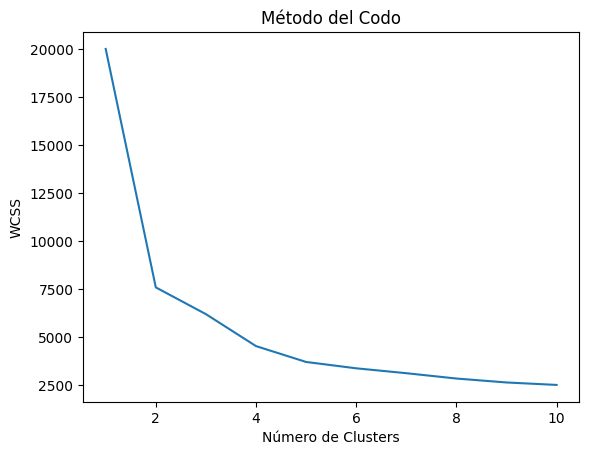

,salary_usd,automation_risk_score,salary_change_vs_prev_year_percent,ai_intensity_score
Cluster_Impacto,,,,
0,72015.840934,0.748854,-0.002097,0.099944
1,84657.235257,0.246575,9.418068,0.682578
2,31749.259328,0.740920,0.041872,0.104994


In [13]:
# seleccion de variables (features)
features = ['salary_usd', 'automation_risk_score', 'salary_change_vs_prev_year_percent','ai_intensity_score']
X = df[features]

# PREPROCESAMIENTO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. MÉTODO DEL CODO (ELBOW METHOD)
# Lo usamos para saber cuántos grupos (clusters) existen realmente en los datos.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficamos el codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Inercia
plt.show()

# 5. ENTRENAMIENTO DEL MODELO
# Supongamos que el "codo" nos dio 3 grupos
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster_Impacto'] = model.fit_predict(X_scaled)

# 6. ANÁLISIS DE RESULTADOS
# Revisamos el promedio de cada grupo para entender qué representan
display(df.groupby('Cluster_Impacto')[features].mean())


### Análisis Exploratorio de Datos (EDA): Gráficos que muestren correlaciones, distribuciones y hallazgos relevantes antes de modelar.


--- Realizando EDA en 4 columnas numéricas ---


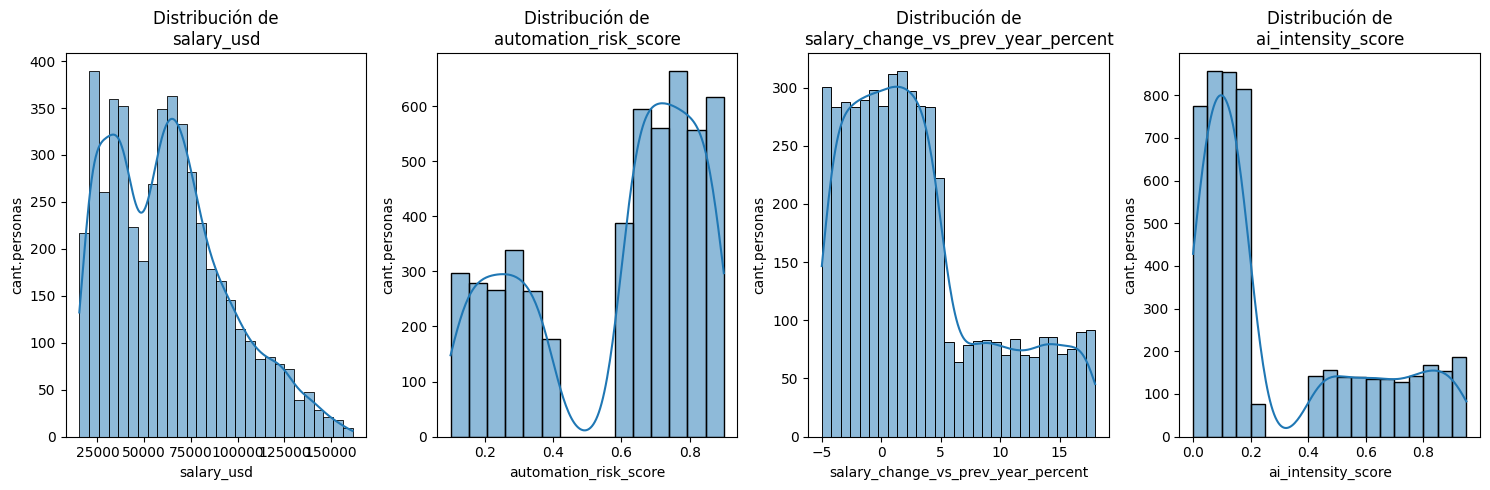

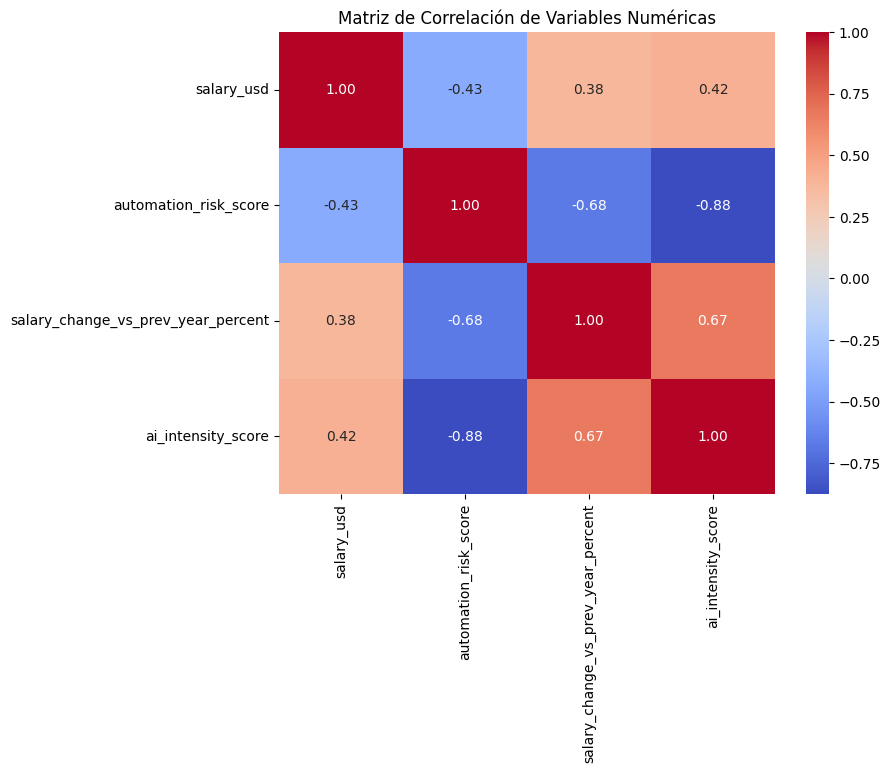


--- 2. Hallazgos clave de Correlación ---
                                    salary_usd  automation_risk_score  \
salary_usd                            1.000000              -0.431737   
automation_risk_score                -0.431737               1.000000   
salary_change_vs_prev_year_percent    0.377662              -0.676072   
ai_intensity_score                    0.419280              -0.875102   

                                    salary_change_vs_prev_year_percent  \
salary_usd                                                    0.377662   
automation_risk_score                                        -0.676072   
salary_change_vs_prev_year_percent                            1.000000   
ai_intensity_score                                            0.668776   

                                    ai_intensity_score  
salary_usd                                    0.419280  
automation_risk_score                        -0.875102  
salary_change_vs_prev_year_percent            0.6

In [16]:
df_cleaned = pd.read_csv('ai_impact_jobs_2010_2025.csv')

available_features = df[features].columns


print(f"\n--- Realizando EDA en {len(available_features)} columnas numéricas ---")

plt.figure(figsize=(15, 5))
for i, feature in enumerate(available_features, 1):
    plt.subplot(1, len(available_features), i)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribución de\n{feature}')
    plt.tight_layout()
    plt.ylabel('cant.personas')
plt.show()

# Matriz de Correlación (Mapa de Calor)
plt.figure(figsize=(8, 6))
corr_matrix = df_cleaned[available_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()
print("\n--- 2. Hallazgos clave de Correlación ---")
print(corr_matrix)




### Modelado: Implementación de al menos dos algoritmos para comparar desempeño (o prueba de varios clusters).

--- Desempeño K-Means ---
Silhouette Score (K-Means): 0.5387

--- Desempeño Agglomerative Clustering ---
Silhouette Score (Agglomerative): 0.5343

--- Comparación Final ---
El modelo K-Means tuvo un mejor desempeño (Score: 0.5387)


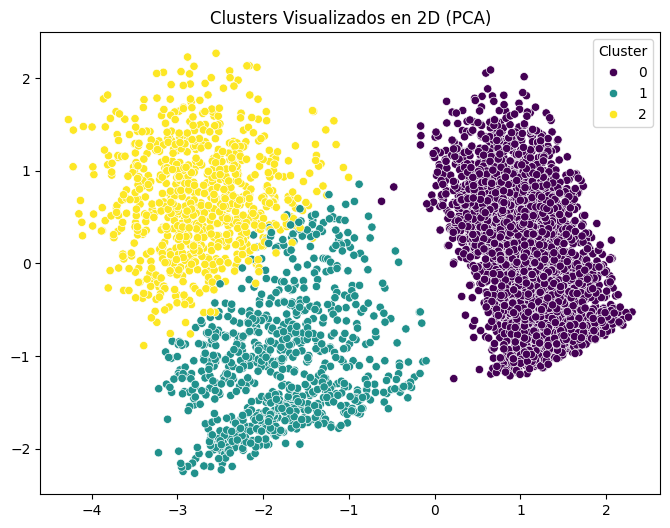

In [21]:
df_cleaned = pd.read_csv('ai_impact_jobs_2010_2025.csv')
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

numeric_features = ['ai_intensity_score', 'salary_usd', 'salary_change_vs_prev_year_percent', 'automation_risk_score']
X = df_cleaned[numeric_features]

# Escalar los datos es crucial para estos modelos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 1. Implementación del Modelo K-Means ---
# Usamos 3 clusters, que fue el número óptimo que identificamos con el método del codo
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Calcular métrica de desempeño para K-Means
# Un valor cercano a 1 es mejor, cercano a 0 es solapado, y negativo es incorrecto.
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"--- Desempeño K-Means ---")
print(f"Silhouette Score (K-Means): {kmeans_score:.4f}")


# --- 2. Implementación del Modelo Agglomerative Clustering ---
# Un método jerárquico que construye clusters fusionando puntos.
agg_model = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_model.fit_predict(X_scaled)

# Calcular métrica de desempeño para Agglomerative
agg_score = silhouette_score(X_scaled, agg_labels)
print(f"\n--- Desempeño Agglomerative Clustering ---")
print(f"Silhouette Score (Agglomerative): {agg_score:.4f}")


# --- 3. Comparación y Hallazgo Relevante ---
print(f"\n--- Comparación Final ---")
if kmeans_score > agg_score:
    print(f"El modelo K-Means tuvo un mejor desempeño (Score: {kmeans_score:.4f})")
    df_cleaned['Cluster'] = kmeans_labels
else:
    print(f"El modelo Agglomerative Clustering tuvo un mejor desempeño (Score: {agg_score:.4f})")
    df_cleaned['Cluster'] = agg_labels

# Opcional: Visualización de los resultados finales (usando PCA para reducir a 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['Cluster'], palette='viridis')
plt.title('Clusters Visualizados en 2D (PCA)')
plt.show()

### Evaluación: Uso de métricas adecuadas (RMSE, R2, Accuracy, Matriz de Confusión, Silhouette Score, etc.).


--- Resultados de la Evaluación de Modelos ---
                     Modelo  Silhouette Score
0                   K-Means          0.538717
1  Agglomerative Clustering          0.534314


/tmp/ipython-input-1485819934.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Silhouette Score', data=results_df, palette='viridis')


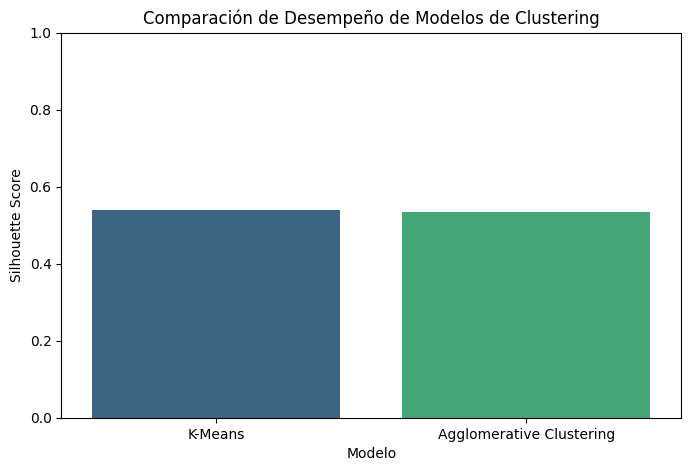


El mejor modelo basado en el Silhouette Score es: **K-Means**


In [22]:
# --- 1. Ejecutar Modelos ---
n_clusters = 3 # Número óptimo de clusters identificado anteriormente

# Modelo K-Means
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Modelo Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_model.fit_predict(X_scaled)


# --- 2. Evaluación de Métricas ---

# Calcular Silhouette Score para K-Means
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# Calcular Silhouette Score para Agglomerative
agg_score = silhouette_score(X_scaled, agg_labels)

# Crear un DataFrame para comparar los resultados
results_df = pd.DataFrame({
    'Modelo': ['K-Means', 'Agglomerative Clustering'],
    'Silhouette Score': [kmeans_score, agg_score]
})

print("\n--- Resultados de la Evaluación de Modelos ---")
print(results_df)

# --- 3. Conclusión y Visualización de la Mejor Métrica ---

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='Silhouette Score', data=results_df, palette='viridis')
plt.title('Comparación de Desempeño de Modelos de Clustering')
plt.ylim(0, 1) # El score va de -1 a 1
plt.show()

# Determinar el mejor modelo
best_model_name = results_df.loc[results_df['Silhouette Score'].idxmax()]['Modelo']
print(f"\nEl mejor modelo basado en el Silhouette Score es: **{best_model_name}**")

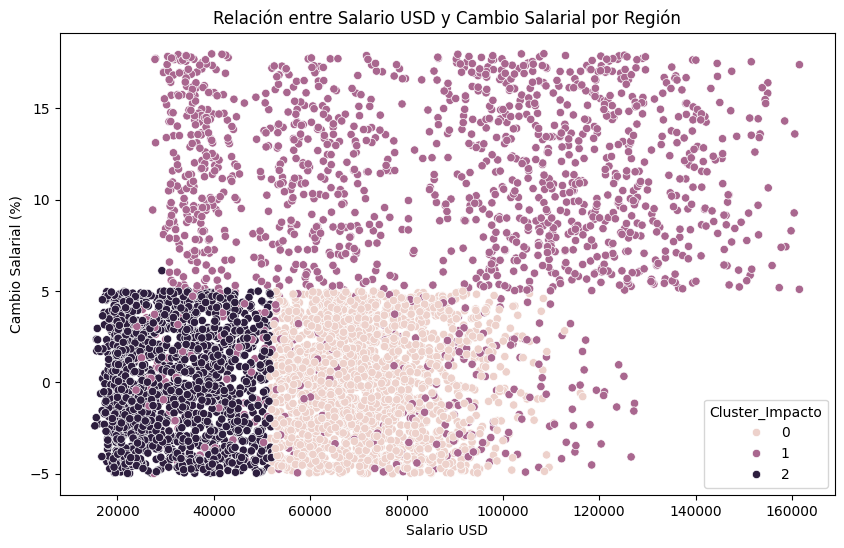

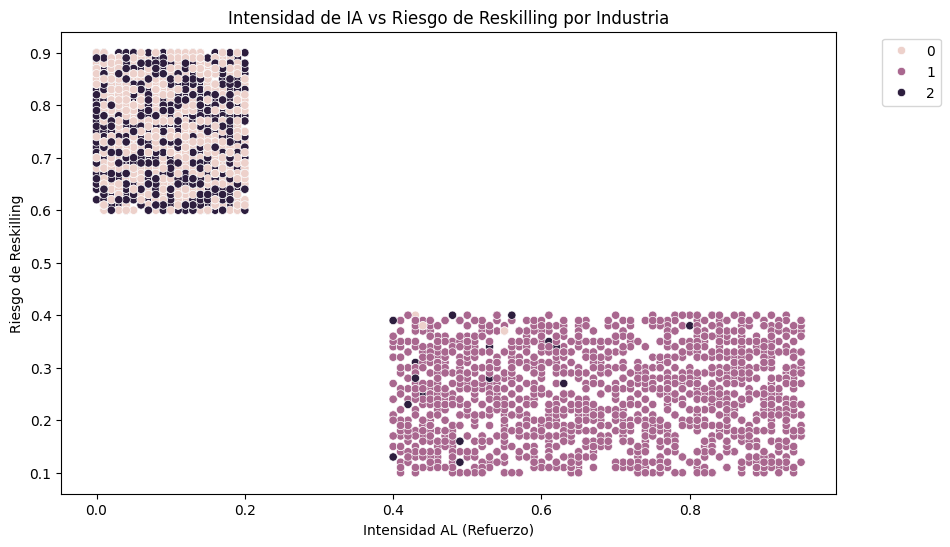

In [24]:
df_cleaned = df.copy()

###no grafica los graficos de dispersion que me falta?

# Relación entre Salario y Cambio Salarial
if 'salary_usd' in available_features and 'salary_change_vs_prev_year_percent' in available_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x='salary_usd', y='salary_change_vs_prev_year_percent', hue = 'Cluster_Impacto')
    plt.title('Relación entre Salario USD y Cambio Salarial por Región')
    plt.xlabel('Salario USD')
    plt.ylabel('Cambio Salarial (%)')
    plt.show()
    # print("Observa si los salarios altos tienden a crecer más rápido.")


    # Relación entre Intensidad de IA y Riesgo de Automatización
if 'ai_intensity_score' in available_features and 'automation_risk_score' in available_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cleaned, x='ai_intensity_score', y='automation_risk_score', hue = 'Cluster_Impacto')
    plt.title('Intensidad de IA vs Riesgo de Reskilling por Industria')
    plt.xlabel('Intensidad AL (Refuerzo)')
    plt.ylabel('Riesgo de Reskilling')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera si hay muchas industrias
    plt.show()

# CONCLUSIONES

### Análisis de Segmentación de Perfiles Laborales y el Impacto de la IA
El análisis ha identificado tres segmentos de empleo distintos basados en el impacto de la inteligencia artificial, el crecimiento salarial y el riesgo de automatización:
1. Roles Estratégicos y de Alto Valor (Cluster 1)
Este segmento representa los perfiles más resilientes y mejor posicionados en la economía impulsada por la IA. Se caracterizan por:

*   Compensación Superior: Salarios significativamente altos.
*   Crecimiento Dinámico: Tasas de crecimiento salarial robustas (+9.4%).
*   Bajo Riesgo de Automatización: Estos roles probablemente integran la IA     como una herramienta central de productividad, más que ser sustituidos por ella.

2. Segmentos de Alto Riesgo y Transición Crítica (Cluster 2)
Este grupo enfrenta desafíos operativos y estratégicos significativos. Es el segmento con mayor vulnerabilidad a la disrupción tecnológica:


*   Compensación Baja: Salarios inferiores al promedio.
*   Crecimiento Estancado: Crecimiento salarial casi nulo.
*   Exposición Máxima a la IA: Alta intensidad de IA sugiere un reemplazo activo de tareas, lo que demanda programas urgentes de reskilling o reubicación.


3. Perfiles de Riesgo Latente (Cluster 0)
Este segmento representa una "clase media" en términos de compensación, pero que enfrenta una incertidumbre considerable:

*   Salarios Competitivos: Remuneración decente y en línea con el mercado actual.
*   Crecimiento Nulo: El estancamiento salarial indica falta de tracción o valor agregado percibido en el mercado actual.
*   Alto Riesgo: Un riesgo de automatización latente que requiere monitoreo proactivo y planificación de carrera a mediano plazo.
